# Study of Analogy based Learning - Image Classification


In this notebook series, we investigate the following question:

- Do the distance-based metrics (e.g., Minkowski, Mahalanobis) provide a reliable measure of similarity between the images of the same class and different classes? 

The **analogy based** learning models such as K-Nearest Neighbors (K-NN) use distance similarity metric to classify images. Typically, image raw pixel values are considered as features. Two images are "similar" (share the same semantic identity or class label) if their pixel-wise Minkowski distance is small. Our goal is to investigate whether this is always true. If not, then why and if there is an effective way to use distance metric to determine semantic similarity. We use the **Euclidean distance** metric as a measure of similarity for comparing the intra-class and inter-class distances. We show that:

- The distance-based metrics (e.g., Minkowski) are not effective, when applied at the raw pixel level, for determining similarity between the images. The inter-class distance is not necessarily and always larger/different from the intra-class distance. It depends on the dataset.



## Tasks

Our similarity analysis study is performed via three tasks.

- Task 1: Compute Inter-class & Intra-class Euclidean Distance

- Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

- Task 3: Visual Similarity Analysis by Projecting the Images on a 2D Space

These three tasks are implemented in the three notebooks of this repository.


## Dataset

We use two popular Machine Learning (ML) image datasets: MNIST handwritten digits & CIFAR-10.

- While the images of the MNIST dataset are "normalized" (centered and similar background), the images of the CIFAR-10 dataset has a lot of variations.


### MNIST

The MNIST (Modified National Institute of Standards and Technology) dataset contains 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

Each image is grayscale 28 x 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).


### CIFAR-10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset contains 60,000 images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 

Each image is color with 32 x 32 x 3 pixels. 


## Summary of Observations


- In the MNIST dataset, there exists a global pattern in the pixel distribution of the same digit across all images of its category. Also all images share the same background. The MNIST data is relatively clean. Digits are preprocessed by normalizing the size and centered in a fixed-size image. On the other hand, we observe a lot of variatiosn in the CIFAR-10 images of the same object. 

- The background pixels in the MNIST images follow a silimar pattern in all images belonging to the same class. However, in CIFAR-10 images, there are a lot of variations in the background pixels across the images of the same object.

- In the MNIST dataset, the intra-class distance is generally smaller than the inter-class distance. However, this is not true in the CIFAR-10 dataset.


- In MNIST, the pixel-level similarity is good enough to determine the semantic identity of the images. This is due to the fact that MNIST images have a strong bias. This bias is manifested as follows.

        -- Images are normalized to have the same size and are centered

        -- Less variation in the distribution of the pixels of the same class

        -- Share the same background

- However, the CIFAR-10 images don't have this bias. As a consequence, pixel level analogy does not lend useful to determine the semantic idetity of the CIFAR-10 images.



## Beyond Raw Pixel Based Similarity: Is Analogy based Learning Effective for Image Classification?

The distance metric does not provide a reliable measure, when applied at the pixel level, to determine semantic identity of an image. It doesn't mean that the distance based technique or analogy based reasoning in general is flawed/weak. The similarity based approach is effective when more expressive and powerful high-level features are extracted from raw pixels. In other words, while distance measures at the raw pixel level produce spurious results, similarity calculation on the high-level features reveal semantic identity.

The following papers achieve state-of-the-art results on image classification by applying the K-NN analogy based approach on the learned features.

- Xu et al. (2020) Hierarchical Semantic Aggregation for Contrastive Representation Learning https://arxiv.org/pdf/2012.02733v1.pdf

- Caron et el. (2021) Unsupervised Learning of Visual Features by Contrasting Cluster Assignments https://arxiv.org/pdf/2006.09882.pdf


### In this notebook, we perform Task 1: Compute Inter-class & Intra-class Euclidean Distance

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from sklearn.metrics.pairwise import euclidean_distances

from scipy.ndimage.interpolation import shift, rotate

from tensorflow import keras

## MNIST

We directly load the MNIST dataset using the Keras API:
https://keras.io/api/datasets/mnist/

The train set contains 60,000 images, and the test set contains 10,000 images.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0


print("\nShape of Training Samples: ", X_train.shape)
print("Shape of Training Labels: ", y_train.shape)

print("\nShape of Testing Samples: ", X_test.shape)
print("Shape of Testing Labels: ", y_test.shape)


Shape of Training Samples:  (60000, 28, 28)
Shape of Training Labels:  (60000,)

Shape of Testing Samples:  (10000, 28, 28)
Shape of Testing Labels:  (10000,)


# MNIST - Task 1: Compute Inter-class & Intra-class Euclidean Distance

For task 1, we create two lists:
- List containing images from the same class
- List containing images from another class


## MNIST: Create a List Containing Samples of the Same Class

We create a list of samples belonging to the same class (digit 9). Each image is labeled with the digit it represents.

- By changing the label (class_index), we can visualize images of a different class.

In [3]:
samples_any_class_mnist = []

class_index = 9 # class index

count = 0
for i in range(len(X_train)):
    if(y_train[i] == class_index):
        samples_any_class_mnist.append(X_train[i])

## MNIST: Compute Euclidean Distance Between the Images of the Same Class

We select the first 64 images of the same class and compute the distance between the first image with the 64 images. Then, we display these 64 images with their distance measures.

In [4]:
distances_mnist = []

for i in range(64):
    current_image = samples_any_class_mnist[0].reshape(1, 784)
    another_image = samples_any_class_mnist[i].reshape(1, 784)
    distances_mnist.append(euclidean_distances(current_image, another_image))

## MNIST: Display A Set of Samples Belonging to the Same Class

We display 64 samples of class "9".

For displaying the image data, we use matplotlib.pyplot's imshow() function:
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html

Below each image we show its Euclidean distance from the first image (top-left). 

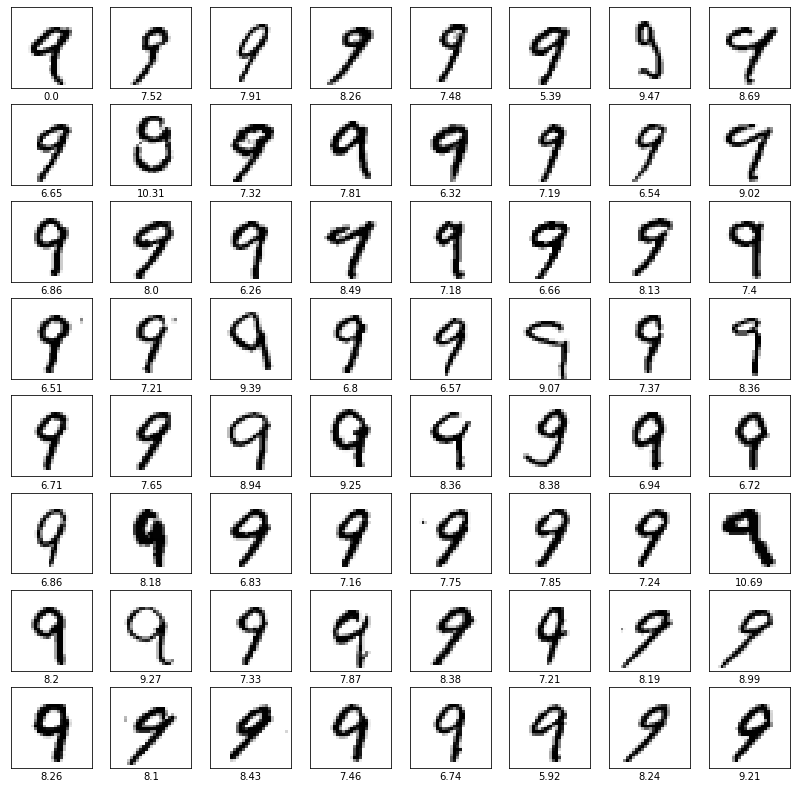

In [5]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_any_class_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_mnist[i][0][0], 2))
plt.show()

## MNIST Observation: Distance Across the Same Class

Observe that the distance between the first image and the remaining images of the same class is less than 9, with a few exceptions.

Now let's compute the distance of the first image (top-left above) with images from another class (e.g., 5).

## MNIST: Create a List Containing Samples of Another Class

We create a list of samples belonging to another class (digit 5).  

In [6]:
samples_another_class_mnist = []

class_index = 5 # class index

count = 0
for i in range(len(X_train)):
    if(y_train[i] == class_index):
        samples_another_class_mnist.append(X_train[i])

## Compute Inter-Class Euclidean Distance 

We select the first 64 images of this new class. We want to compute the distance of these 64 images of digit "5" with an image of digit "9". 

For convenience, we store an image of "9" as the first image in the list below. Then, compute the distance between "9" with the 64 images. 

In [7]:
samples_another_class_mnist[0] = samples_any_class_mnist[0]

distances_mnist_another_class = []

for i in range(64):
    current_image = samples_another_class_mnist[0].reshape(1, 784)
    another_image = samples_another_class_mnist[i].reshape(1, 784)
    distances_mnist_another_class.append(euclidean_distances(current_image, another_image))

## MNIST: Display A Set of Samples Belonging to Two Classes

We display 63 images of "5" and an image of "9" (the first image).

Below each image we show its Euclidean distance from the first image (top-left). 

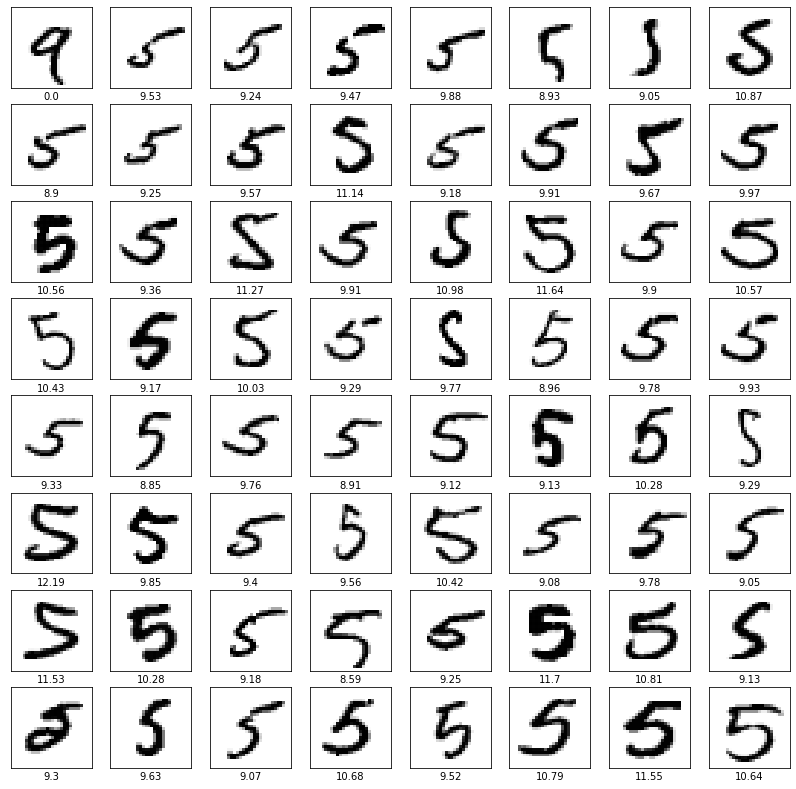

In [8]:
plt.figure(figsize=(14,14))

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_another_class_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_mnist_another_class[i][0][0], 2))
plt.show()

## MNIST Task 1 - Observation: Inter-Class Distance 

Observe that the distance between the image of "9" (first image) and the images of "5" (remaining images) is generally greater than 9, with a few exceptions.

- In other words, inter-class distance is larger, which is intuitive.

However, in case of the images in the CIFAR-10 dataset, we will see that there is no significant difference in the inter-class and intra-class distances.

# CIFAR-10

We directly load the CIFAR-10 dataset using the Keras API:
https://keras.io/api/datasets/cifar10/

The train set contains 50,000 images, and the test set contains 10,000 images.

In [9]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Scale the data
X_train_cifar = X_train_cifar/255.0
X_test_cifar = X_test_cifar/255.0

print("\nShape of Training Samples: ", X_train_cifar.shape)
print("Shape of Training Labels: ", y_train_cifar.shape)

print("\nShape of Testing Samples: ", X_test_cifar.shape)
print("Shape of Testing Labels: ", y_test_cifar.shape)


Shape of Training Samples:  (50000, 32, 32, 3)
Shape of Training Labels:  (50000, 1)

Shape of Testing Samples:  (10000, 32, 32, 3)
Shape of Testing Labels:  (10000, 1)


## CIFAR-10: Create a List of Class Names

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# CIFAR-10 - Task 1: Compute Inter-class & Intra-class Euclidean Distance

For task 1, we create two lists:
- List containing images from the same class
- List containing images from another class


## CIFAR-10: Create a List Containing Samples of the Same Class

We use a class index (from the above list) to create a list of samples belonging to that class (i.e., truck).

In [11]:
samples_any_class_cifar10 = []

class_index = 9 # class index

for i in range(len(X_train_cifar)):
    if(y_train_cifar[i] == class_index):
        samples_any_class_cifar10.append(X_train_cifar[i])

## CIFAR-10: Compute Euclidean Distance Between the Images of the Same Class

We select the first 64 images of the same class (i.e., truck) and compute the distance between the first image with the 64 images. Then, we display these 64 images with their distance measures.

In [12]:
distances_cifar10 = []

for i in range(64):
    current_image = samples_any_class_cifar10[0].reshape(1, 3072)
    another_image = samples_any_class_cifar10[i].reshape(1, 3072)
    distances_cifar10.append(euclidean_distances(current_image, another_image))

## CIFAR-10: Display A Set of Samples Belonging to the Same Class

We display 64 images of the class "truck".

Below each image we show its Euclidean distance from the first image (top-left). 

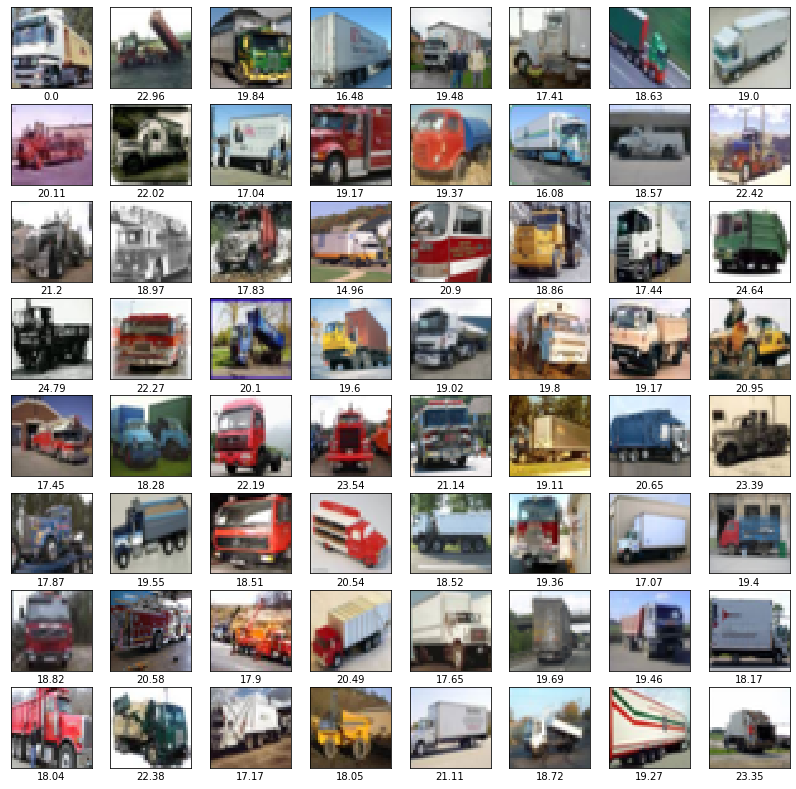

In [13]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_any_class_cifar10[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_cifar10[i][0][0], 2))
plt.show()

## CIFAR-10 Observation: Distance Across the Same Class

Observe that the distance between the first image and the remaining images of the same class varies in the range between 17 to 22.

Now let's compute the distance of the first image (top-left above) and images from another class (e.g., dog).

## CIFAR-10: Create a List Containing Samples of Another Class

We create a list of images belonging to another class (i.e., dog).  

In [14]:
samples_another_class_cifar10 = []

class_index = 5 # class index

count = 0
for i in range(len(X_train_cifar)):
    if(y_train_cifar[i] == class_index):
        samples_another_class_cifar10.append(X_train_cifar[i])

## CIFAR-10: Compute Inter-Class Euclidean Distance 

We select the first 64 images of this new class. We want to compute the distance of these 64 images of "dog" with an image of a "truck". 

For convenience, we store the image of a "truck" as the first image in the list below. Then, compute the distance between "truck" with the 64 images. 

In [15]:
samples_another_class_cifar10[0] = samples_any_class_cifar10[0]

distances_cifar10_another_class = []

for i in range(64):
    current_image = samples_another_class_cifar10[0].reshape(1, 3072)
    another_image = samples_another_class_cifar10[i].reshape(1, 3072)
    distances_cifar10_another_class.append(euclidean_distances(current_image, another_image))

## CIFAR-10: Display A Set of Samples Belonging to Two Classes

We display 63 images of "dog" and an image of a "truck" (first image).

Below each image we show its Euclidean distance from the first image (top-left). 

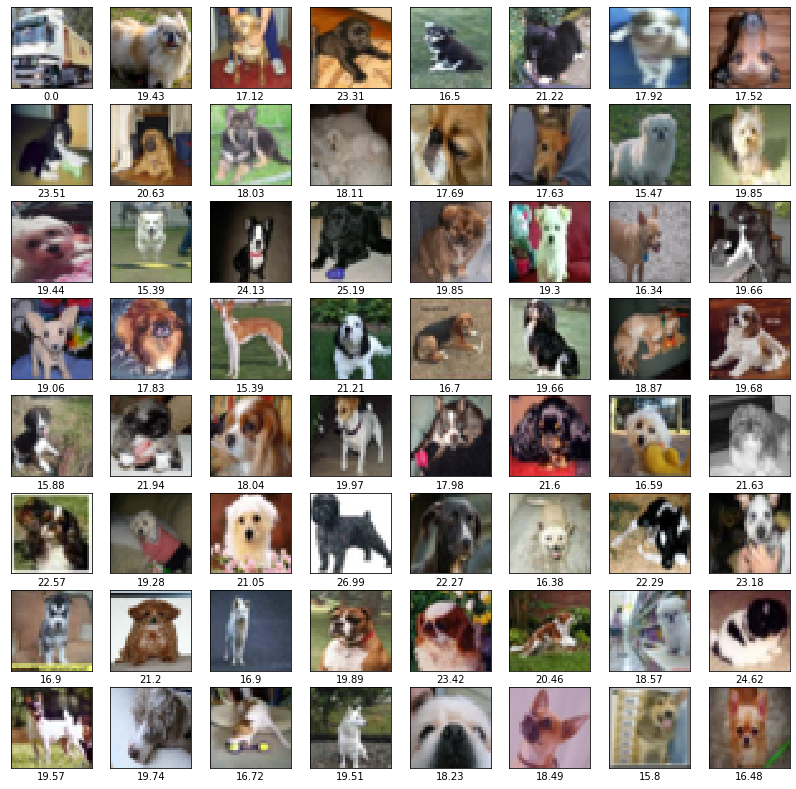

In [16]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_another_class_cifar10[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_cifar10_another_class[i][0][0], 2))
plt.show()

## CIFAR-10 Task 1 - Observation: Inter-Class Distance 

Observe that the distance between the image of "truck" (first image) and the images of "dog" (remaining images) is in the range of 15 to 22.

- The inter-class distance is not significantly different from the intra-class distance. 

Thus, a similary based approach (i.e., analogy based approach), when applied pixel-wise, will not yield better performance to differentiate images belonging to different classes in the CIFAR-10 dataset.